<a href="https://colab.research.google.com/github/tomersk/python-applications/blob/main/01_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Reading Netcdf file for one year

In [1]:
from google.colab import drive
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

drive.mount("/content/gdrive/")

file = '/content/gdrive/My Drive/Colab Notebooks/IMD/rain_1901.nc'




Mounted at /content/gdrive/


In [2]:
ds = nc.Dataset(file)
print(ds)

# print the dimensions of the nc file
print(ds.dimensions)
print(ds.variables)
print("======= Variable names on seperate line =====")
# print one by one
for var in ds.variables:
  print(var)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    dimensions(sizes): lat(129), lon(135), time(365)
    variables(dimensions): int32 time(time), float64 lon(lon), float64 rain(lat, lon, time), float64 lat(lat)
    groups: 
{'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 129, 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 135, 'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 365}
{'time': <class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: days since 1901-01-01 00:00:00
    calendar: proleptic_gregorian
unlimited dimensions: 
current shape = (365,)
filling on, default _FillValue of -2147483647 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    _FillValue: nan
unlimited dimensions: 
current shape = (135,)
filling on, 'rain': <class 'netCDF4._netCDF4.Variable'>
float64 rain(lat, lon, time)
    long_name: rainfall
    units: mm/day
    _FillValue: n

In [5]:
latitude=ds.variables['lat'][:]
longitude=ds.variables['lon'][:]
day=ds.variables['time'][:]
rainfall=ds.variables['rain'][:]
Year=ds.variables['time'].units[11:15]

In [6]:
ds.close()

2. Visualizing Data- 1 Day rainfall plot

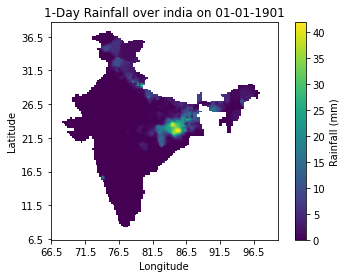

In [7]:
plt.imshow(rainfall[:,:,1])
cbar=plt.colorbar()
cbar.set_label('Rainfall (mm)')
x=np.arange(0, 140, 20)
plt.xticks(x,longitude[x])
y=x=np.arange(0, 140, 20)
plt.yticks(y,latitude[y])
plt.gca().invert_yaxis()
plt.title("1-Day Rainfall over india on 01-01-1901")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

2. Calculating and visualizing monthly average precipitation for a year

In [9]:
import datetime
start = datetime.datetime.strptime("01-01-"+Year, "%d-%m-%Y")
end = datetime.datetime.strptime("31-12-"+Year, "%d-%m-%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days+1)]

In [18]:
Rainfall_Monthly=np.empty((rainfall.shape[0],rainfall.shape[1],12))
for i in range(len(latitude)):
  for j in range(len(longitude)):  
    rain_df = pd.DataFrame({'date':date_generated,'rain':rainfall[i,j,:]})
    rain_df = rain_df.set_index('date')
    rain_df_monthly = rain_df.resample('M').sum()
    Rainfall_Monthly[i,j,:]=rain_df_monthly.rain


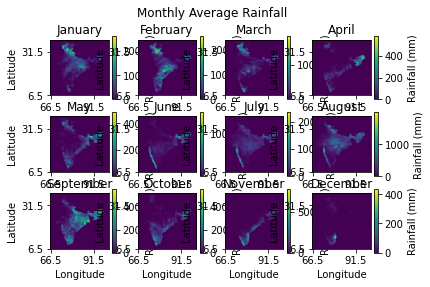

In [19]:
Month_name=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for mon in range(Rainfall_Monthly.shape[2]):
    plt.subplot(3, 4, mon+1)
    plt.imshow(Rainfall_Monthly[:,:,mon])
    cbar=plt.colorbar()
    cbar.set_label('Rainfall (mm)')
    x=np.arange(0, 140, 100)
    plt.xticks(x,longitude[x])
    y=x=np.arange(0, 140, 100)
    plt.yticks(y,latitude[y])
    plt.gca().invert_yaxis()
    plt.title(Month_name[mon])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    #plt.show()
plt.suptitle("Monthly Average Rainfall")
plt.show()

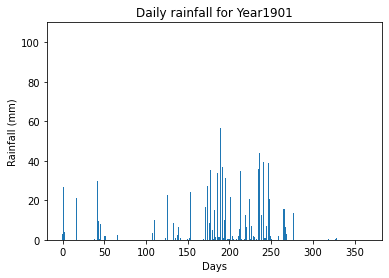

In [8]:
plt.bar(day,rainfall[latitude.tolist().index(23.5),longitude.tolist().index(85.5),:])
plt.title("Daily rainfall for Year"+Year)
plt.xlabel('Days')
plt.ylabel('Rainfall (mm)')
plt.show()

                  rain
date                  
1901-01-31   95.651774
1901-02-28   81.023624
1901-03-31    4.052088
1901-04-30   21.568911
1901-05-31   46.750196
1901-06-30  124.957769
1901-07-31  259.414460
1901-08-31  348.255020
1901-09-30  254.411488
1901-10-31   21.003837
1901-11-30    6.347978
1901-12-31    0.000000


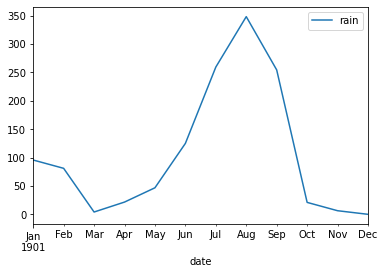

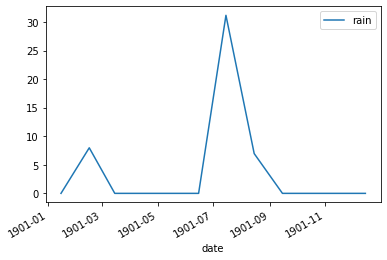

In [23]:
rain_df = pd.DataFrame({'date':date_generated,'rain':rainfall[latitude.tolist().index(23.5),longitude.tolist().index(85.5),:]})
rain_df = rain_df.set_index('date')
rain_df_monthly = rain_df.resample('M').sum()
print(rain_df_monthly)
rain_df_monthly.plot()
rain_df[rain_df.index.day==15].plot()
plt.show()
